<a href="https://colab.research.google.com/github/aryasuneesh/ml-workshop/blob/main/Machine_Learning_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Workshop
---
### What is machine learning?
Machine learning is the study of algorithms that can improve automatically through experience and/or through data. Unlike "normal" programming, where you explicitly tell the program what to do, in machine learning, the algorithm "learns" what to do based on some data/experience. Machine learning has enables us to solve complex problems with computers, that would otherwise be impossible.

### AI vs Machine Learning vs Deep Learning
![ai vs ml vs dl](https://i.imgur.com/SOlsK1X.png)

### Why is ML so popular right now?
![popular](https://i.imgur.com/urwStCV.png)

### What does ML development look like?
![dev](https://i.imgur.com/bzGjnnT.png)

# Intro To Colab
---
- Online code environment
- Python3 Jupyter notebook
- Pre-installed python libraries (numpy, tensorflow, matplotlib, etc..)
- Shareable and allows for colaboration
- Runs on the cloud (can choose between CPU, GPU, or TPU acceleration)
- Can connect it to google drive
- Much much more!

In [ ]:
print("hello world") # press the run button on the left

hello world


In [ ]:
# runs python code
x = 10 
print(x + 2)

12


In [ ]:
# state persists between cells
x / 2

5.0

In [ ]:
# comes installed with libraries
import numpy as np
import matplotlib.pyplot as plt

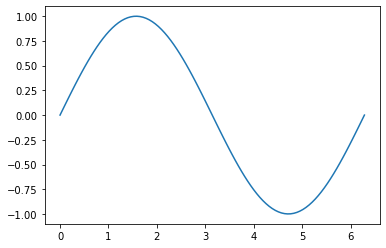

In [ ]:
# can plot stuff
x = np.linspace(0, 2*np.pi, 100)
plt.plot(x, np.sin(x))

In [ ]:
!lscpu # with an ! point, you can call command line arguments

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [ ]:
!ls sample_data # you can upload and modify files, (NOTE: files are not persitent, if the runtime resets, you lose all files)

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!nvidia-smi # change Runtime > Change Runtime Type > GPU, then run this cell

Sat Jan 22 03:14:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    32W / 250W |   1137MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%reset -f

# Data Exploration and Linear Regression - Anscombe
---

### Load JSON Data

In [ ]:
import json

In [ ]:
with open("sample_data/anscombe.json") as fi:
    anscombe_data = json.load(fi)

In [ ]:
anscombe_data

[{'Series': 'I', 'X': 10.0, 'Y': 8.04},
 {'Series': 'I', 'X': 8.0, 'Y': 6.95},
 {'Series': 'I', 'X': 13.0, 'Y': 7.58},
 {'Series': 'I', 'X': 9.0, 'Y': 8.81},
 {'Series': 'I', 'X': 11.0, 'Y': 8.33},
 {'Series': 'I', 'X': 14.0, 'Y': 9.96},
 {'Series': 'I', 'X': 6.0, 'Y': 7.24},
 {'Series': 'I', 'X': 4.0, 'Y': 4.26},
 {'Series': 'I', 'X': 12.0, 'Y': 10.84},
 {'Series': 'I', 'X': 7.0, 'Y': 4.81},
 {'Series': 'I', 'X': 5.0, 'Y': 5.68},
 {'Series': 'II', 'X': 10.0, 'Y': 9.14},
 {'Series': 'II', 'X': 8.0, 'Y': 8.14},
 {'Series': 'II', 'X': 13.0, 'Y': 8.74},
 {'Series': 'II', 'X': 9.0, 'Y': 8.77},
 {'Series': 'II', 'X': 11.0, 'Y': 9.26},
 {'Series': 'II', 'X': 14.0, 'Y': 8.1},
 {'Series': 'II', 'X': 6.0, 'Y': 6.13},
 {'Series': 'II', 'X': 4.0, 'Y': 3.1},
 {'Series': 'II', 'X': 12.0, 'Y': 9.13},
 {'Series': 'II', 'X': 7.0, 'Y': 7.26},
 {'Series': 'II', 'X': 5.0, 'Y': 4.74},
 {'Series': 'III', 'X': 10.0, 'Y': 7.46},
 {'Series': 'III', 'X': 8.0, 'Y': 6.77},
 {'Series': 'III', 'X': 13.0, 'Y': 12.7

### Data Exploration

In [ ]:
import pandas as pd

In [ ]:
anscombe_df = pd.DataFrame(anscombe_data)
anscombe_df

,Series,X,Y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.81


In [ ]:
anscombe_df.groupby("Series").count()

,X,Y
Series,,
I,11,11
II,11,11
III,11,11
IV,11,11


In [ ]:
anscombe_df.groupby("Series").mean()

,X,Y
Series,,
I,9.0,7.500000
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [ ]:
anscombe_df.groupby("Series").var()

,X,Y
Series,,
I,11.0,4.132640
II,11.0,4.127629
III,11.0,4.122620
IV,11.0,4.123249


In [ ]:
anscombe_df.groupby("Series").corr()

X         Y
Series                      
I      X  1.000000  0.816186
       Y  0.816186  1.000000
II     X  1.000000  0.816237
       Y  0.816237  1.000000
III    X  1.000000  0.816287
       Y  0.816287  1.000000
IV     X  1.000000  0.816521
       Y  0.816521  1.000000

Series
I      AxesSubplot(0.125,0.125;0.775x0.755)
II     AxesSubplot(0.125,0.125;0.775x0.755)
III    AxesSubplot(0.125,0.125;0.775x0.755)
IV     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

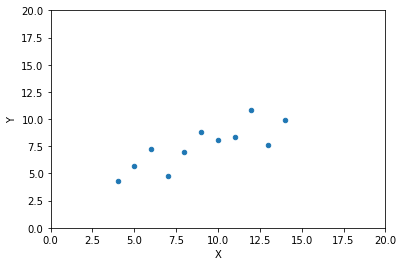

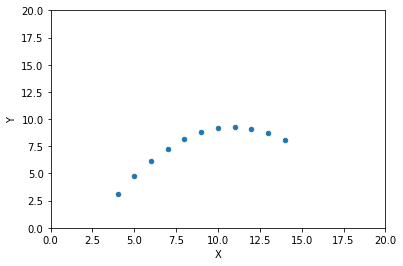

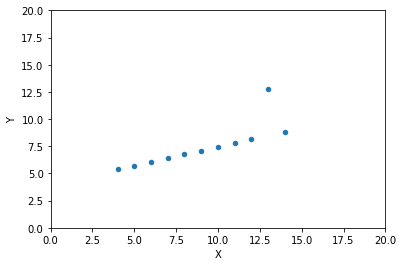

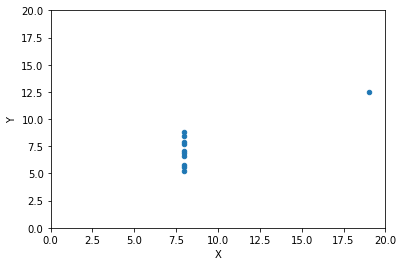

In [ ]:
anscombe_df.groupby("Series").plot.scatter(
    x='X',
    y='Y',
    xlim=(0, 20),
    ylim=(0, 20)
)

In [ ]:
anscombe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     float64
 2   Y       44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
anscombe_df.describe()

,X,Y
count,44.000000,44.000000
mean,9.000000,7.500455
std,3.198837,1.959244
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [ ]:
anscombe_df.groupby("Series").describe()

X                           ...     Y                          
       count mean       std  min  25%  ...   min    25%   50%   75%    max
Series                                 ...                                
I       11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II      11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III     11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV      11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

### Linear Regression

In [ ]:
# NOTE: series here is just the name the anscombe dataset decided to call each set of points, 
# the variable series1 is NOT a pandas.Series, but a pandas.DataFrame object
series1_df = anscombe_df[anscombe_df["Series"] == "I"]
series1_df

,Series,X,Y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.81


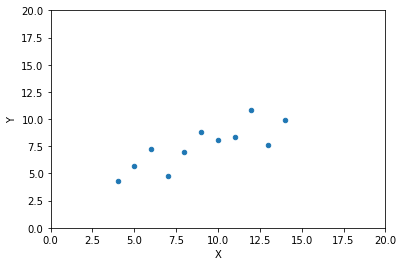

In [ ]:
series1_df.plot.scatter(x="X", y="Y", xlim=(0, 20), ylim=(0, 20))

0.5002727272727278 2.9975454545454525


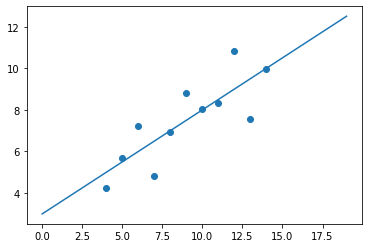

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m, b = np.polyfit(series1_df["X"], series1_df["Y"], deg=1)
print(m, b)

x = np.arange(20)
plt.scatter(series1_df["X"], series1_df["Y"])
plt.plot(x, m*x + b)

In [ ]:
from sklearn.linear_model import LinearRegression

# sklearn linear regression is generalized to work
# on multiple inputs and multiple outputs, so it expects:
#     x = (num examples, num features)
#     y = (num examples, num outputs)
# In our case, we only have one feature, df["X"], and 
# only one output, df["Y"], so we need to reshape these
# 1 dimensional arrays into a 2 dimensional array, where
# the second dimension is 1
x = np.array(series1_df["X"])
y = np.array(series1_df["Y"])

print(x.shape, y.shape)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(11,) (11,)
(11, 1) (11, 1)


In [ ]:
reg = LinearRegression().fit(x, y)
reg.score(x, y) # R^2 of regression

0.6661603280667607

0.5002727272727274 2.9975454545454534


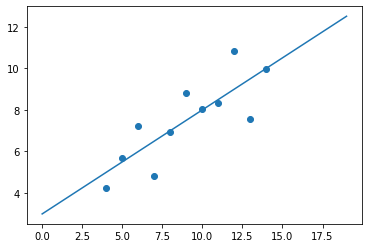

In [ ]:
m = reg.coef_[0][0]
b = reg.intercept_[0]
print(m, b)

x = np.arange(20)
y_pred = reg.predict(x.reshape(-1, 1))
plt.scatter(series1_df["X"], series1_df["Y"])
plt.plot(x, y_pred)

series: I
R^2 = 0.666
m (slope) = 0.5
b (intercept) = 2.998


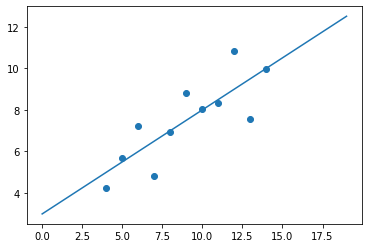


series: II
R^2 = 0.666
m (slope) = 0.5
b (intercept) = 3.001


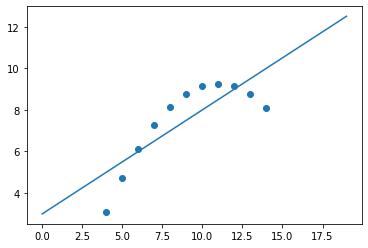


series: III
R^2 = 0.666
m (slope) = 0.5
b (intercept) = 3.002


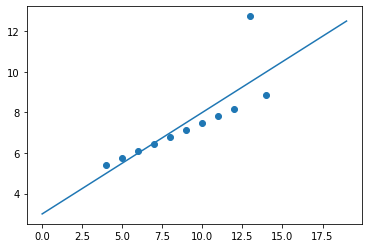


series: IV
R^2 = 0.667
m (slope) = 0.5
b (intercept) = 3.002


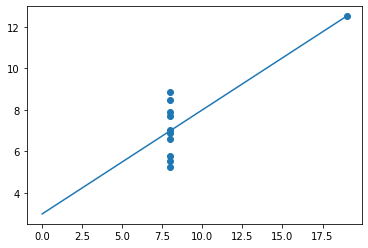

In [ ]:
for title, series_df in anscombe_df.groupby("Series"):
    x = np.array(series_df["X"]).reshape(-1, 1)
    y = np.array(series_df["Y"]).reshape(-1, 1)

    reg = LinearRegression().fit(x, y)
    r2 = round(reg.score(x, y), 3)
    slope = round(reg.coef_[0][0], 3)
    intercept = round(reg.intercept_[0], 3)

    print("series:", title)
    print("R^2 =", r2)
    print("m (slope) =", slope)
    print("b (intercept) =", intercept)
    x = np.arange(0, 20)
    plt.scatter(series_df["X"], series_df["Y"])
    plt.plot(x, y_pred)
    plt.show()
    print()

In [ ]:
%reset -f

# Classical Machine Learning - California Housing
---
Census data from 1990 on housing data for California blocks. [More info.](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

### Data Exploration

In [ ]:
import pandas as pd
housing_train_df = pd.read_csv("sample_data/california_housing_train.csv")
housing_test_df = pd.read_csv("sample_data/california_housing_test.csv")

In [ ]:
housing_train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
housing_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
housing_train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


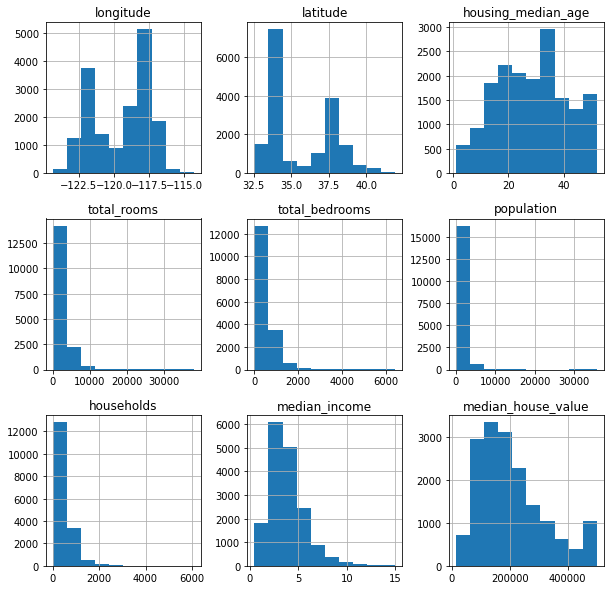

In [ ]:
_ = housing_train_df.hist(figsize=(10, 10))

### Scaling the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

feature_columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value"]
label_columns = ["median_income"]

feature_scaler = MinMaxScaler().fit(housing_train_df[feature_columns])
label_scaler = MinMaxScaler().fit(housing_train_df[label_columns])

In [ ]:
scaled_train_df = housing_train_df.copy()
scaled_test_df = housing_test_df.copy()

scaled_train_df[feature_columns] = feature_scaler.transform(housing_train_df[feature_columns])
scaled_train_df[label_columns] = label_scaler.transform(housing_train_df[label_columns])

scaled_test_df[feature_columns] = feature_scaler.transform(housing_test_df[feature_columns])
scaled_test_df[label_columns] = label_scaler.transform(housing_test_df[label_columns])

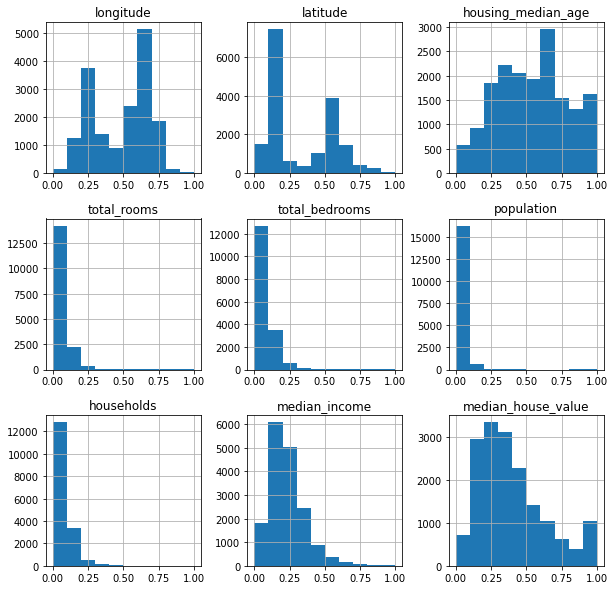

In [ ]:
_ = scaled_train_df.hist(figsize=(10, 10))

### Train a Regression Model

In [ ]:
import numpy as np

X_train = np.array(scaled_train_df[feature_columns])
y_train = np.array(scaled_train_df[label_columns])

X_test = np.array(scaled_test_df[feature_columns])
y_test = np.array(scaled_test_df[label_columns])

print("X_train =", X_train.shape)
print("y_train =", y_train.shape)
print("X_test =", X_test.shape)
print("y_test =", y_test.shape)

X_train = (17000, 8)
y_train = (17000, 1)
X_test = (3000, 8)
y_test = (3000, 1)


In [ ]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor()
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor()

In [ ]:
predictions = reg.predict(X_test)
predictions[:10]

array([0.37154598, 0.21567799, 0.38613535, 0.34453735, 0.17120104,
       0.14098226, 0.12145592, 0.21577679, 0.23590932, 0.17034323])

In [ ]:
y_test[:10]

array([[0.42127695],
       [0.21372809],
       [0.36506393],
       [0.38868429],
       [0.16810803],
       [0.08024717],
       [0.08028855],
       [0.18793534],
       [0.21859698],
       [0.12643964]])

In [ ]:
# predictions and labels are scaled so we unscale them
# note: the median income column is in tens of thousands of US dollars
labels_scaled = label_scaler.inverse_transform(y_test)
predictions_scaled = label_scaler.inverse_transform(predictions.reshape(-1, 1))

predictions_scaled[:10]

array([[5.88739105],
       [3.62727405],
       [6.09893978],
       [5.49576053],
       [2.98234928],
       [2.54417095],
       [2.26103516],
       [3.6287066 ],
       [3.92063235],
       [2.96991091]])

In [ ]:
list(zip(labels_scaled, predictions_scaled))[:10]

[(array([6.6085]), array([5.88739105])),
 (array([3.599]), array([3.62727405])),
 (array([5.7934]), array([6.09893978])),
 (array([6.1359]), array([5.49576053])),
 (array([2.9375]), array([2.98234928])),
 (array([1.6635]), array([2.54417095])),
 (array([1.6641]), array([2.26103516])),
 (array([3.225]), array([3.6287066])),
 (array([3.6696]), array([3.92063235])),
 (array([2.3333]), array([2.96991091]))]

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(labels_scaled, predictions_scaled)

0.6889621165143928

### Testing Other Models

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
mean_absolute_error(
    label_scaler.inverse_transform(y_test),
    label_scaler.inverse_transform(reg.predict(X_test).reshape(-1, 1))
)

0.7492148448660685

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=64)
reg.fit(X_train, y_train)
mean_absolute_error(
    label_scaler.inverse_transform(y_test),
    label_scaler.inverse_transform(reg.predict(X_test).reshape(-1, 1))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.61471766875

In [ ]:
%reset -f

# Multi-layer Perceptron MNIST Classifier with Sklearn
---

### The Task
- Build a classifier that, given an image of a hand-written digit, can predict what digits the image is of

### The Data
- MNIST dataset
- 28 by 28 grayscale handwritten digits
- each image is labelled with digit it represents

![mnist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

### The Approach
- An MLP (multi-layer perceptron neural network, also sometimes called a fully connected neural network)
- [tensorflow playground MLP demo](https://playground.tensorflow.org/)

![nn](https://i.imgur.com/igfsodk.gif)

### The Data 

In [ ]:
# data is stored as a csv (comma seperated values file)
#
# each row represents an image
#
# each row has 785 numbers
#
# the first number is the label
#
# the next 784 numbers are the grayscale values of the flattened image 
# (0 for black, 255 for white)
# note: (28*28 = 784)
!head sample_data/mnist_train_small.csv

6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,67,67,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,252,252,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,250,232,30,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,222,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,147,252,183,5,0,0,0,0,0,0,0,20,89,89,73,0,0,0,0,0,0,0,0,0,0,0,0,48,247,252,159,0,0,0,0,0,0,0,79,236,252,252,249,198,16,0,0,0,0,0,0,0,0,0,41,193,252,199,22,0,0,0,0,0,12,135,248,252,252,252,252,252,100,0,0,0,0,0,0,0,0,0,100,252,252,88,0,0,0,0,0,11,171,252,252,235,175,178,252,252,224,0,0,0,0,0,0,0,0,15,209,252,233,12,0,0,0,0,49,177,252,252,89,26,0,2,166,252,252,0,0,0,0,0,0,0,0,96,253,253,59,0,0,0,0,11,177,255,253,92,0,0,0,0,155,253,128,0,0,0,0,0,0,0,0,143,252,252,10,0,0,0,12,171,252,216,110,13,0,0,0,3,180,

In [ ]:
# load the data as a numpy array
import numpy as np

train_data = np.loadtxt("sample_data/mnist_train_small.csv", delimiter=",")
test_data = np.loadtxt("sample_data/mnist_test.csv", delimiter=",")

print("number of tranining images: ", len(train_data))
print("shape of training data:     ", train_data.shape)
print("number of testing images:   ", len(test_data))
print('shape of testing data:      ', test_data.shape)

number of tranining images:  20000
shape of training data:      (20000, 785)
number of testing images:    10000
shape of testing data:       (10000, 785)


In [ ]:
# split the data into features and labels
train_X = train_data[:, 1:].astype(np.float32)
train_y = train_data[:, 0].astype(np.float32)

test_X = test_data[:, 1:].astype(np.float32)
test_y = test_data[:, 0].astype(np.float32)

print("train_X shape:\t", train_X.shape)
print("train_y shape:\t", train_y.shape)
print("test_X shape:\t", test_X.shape)
print("test_y shape:\t", test_y.shape)

train_X shape:	 (20000, 784)
train_y shape:	 (20000,)
test_X shape:	 (10000, 784)
test_y shape:	 (10000,)


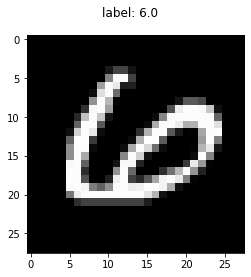

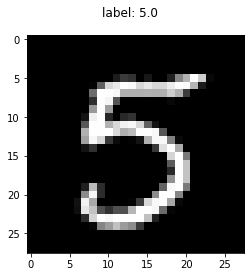

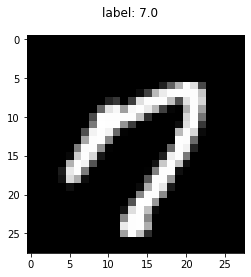

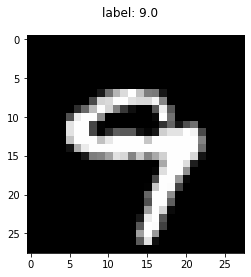

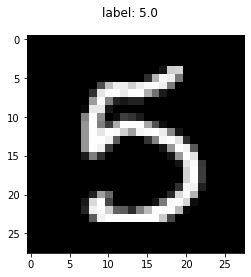

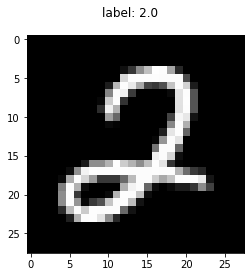

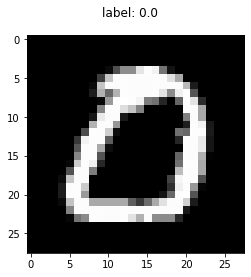

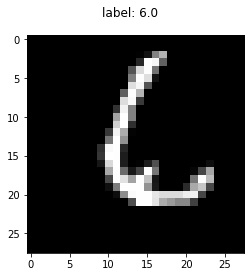

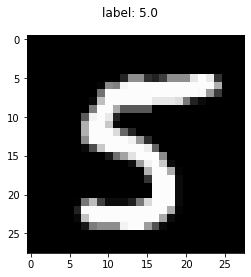

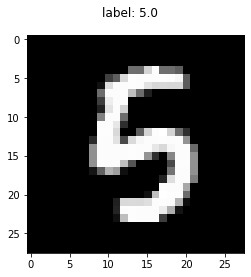

In [ ]:
# show first 10 training images
import matplotlib.pyplot as plt

for i in range(10):
    fig = plt.figure()
    fig.suptitle("label: " + str(train_y[i]))
    plt.imshow(train_X[i].reshape(28, 28), cmap="gray")

### Train MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    max_iter=20,
    verbose=True,
    early_stopping=True
)
clf.fit(train_X, train_y)

Iteration 1, loss = 3.20848554
Validation score: 0.776000
Iteration 2, loss = 0.84476107
Validation score: 0.827000
Iteration 3, loss = 0.52687598
Validation score: 0.861000
Iteration 4, loss = 0.38089798
Validation score: 0.876000
Iteration 5, loss = 0.29198638
Validation score: 0.882000
Iteration 6, loss = 0.23776595
Validation score: 0.900000
Iteration 7, loss = 0.18615178
Validation score: 0.898500
Iteration 8, loss = 0.15816922
Validation score: 0.903500
Iteration 9, loss = 0.12981441
Validation score: 0.915000
Iteration 10, loss = 0.09992413
Validation score: 0.914500
Iteration 11, loss = 0.08724581
Validation score: 0.914500
Iteration 12, loss = 0.07463447
Validation score: 0.923500
Iteration 13, loss = 0.06402787
Validation score: 0.924000
Iteration 14, loss = 0.05738431
Validation score: 0.928500
Iteration 15, loss = 0.05209765
Validation score: 0.927000
Iteration 16, loss = 0.04753405
Validation score: 0.927500
Iteration 17, loss = 0.03751513
Validation score: 0.936000
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64, 32),
              max_iter=20, verbose=True)

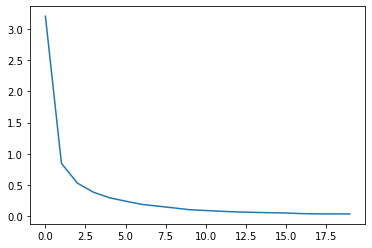

In [ ]:
plt.plot(clf.loss_curve_)

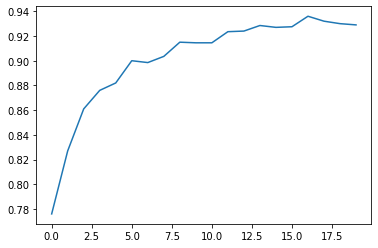

In [ ]:
plt.plot(clf.validation_scores_)

### Evaluate

In [ ]:
predictions = clf.predict(test_X)
predictions[:10]

array([7., 2., 1., 0., 4., 1., 4., 9., 6., 9.], dtype=float32)

In [ ]:
test_y[:10]

array([7., 2., 1., 0., 4., 1., 4., 9., 5., 9.], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       980
         1.0       0.97      0.98      0.98      1135
         2.0       0.93      0.91      0.92      1032
         3.0       0.90      0.92      0.91      1010
         4.0       0.91      0.94      0.92       982
         5.0       0.88      0.90      0.89       892
         6.0       0.94      0.94      0.94       958
         7.0       0.94      0.90      0.92      1028
         8.0       0.93      0.88      0.90       974
         9.0       0.91      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



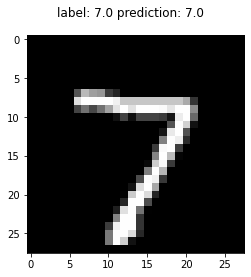

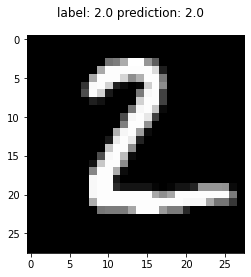

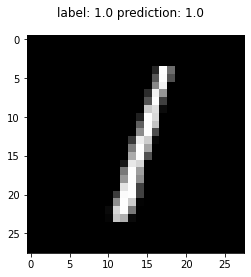

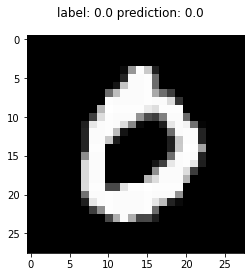

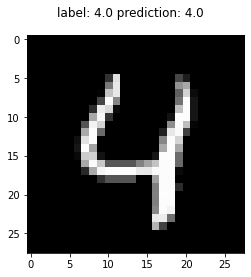

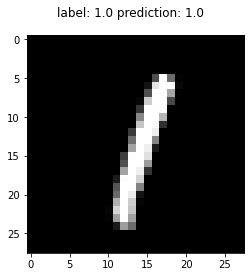

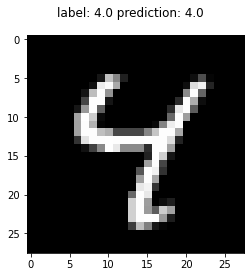

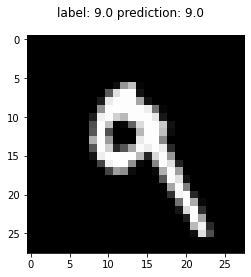

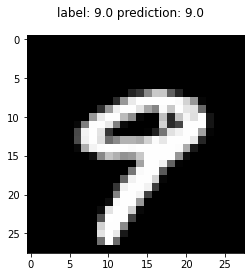

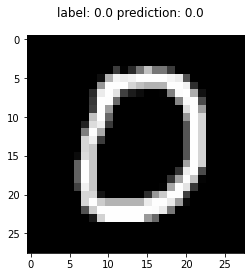

In [ ]:
i = 0
n = 0
while n < 10:
    if int(predictions[i]) == int(test_y[i]):
        fig = plt.figure()
        fig.suptitle("label: " + str(test_y[i]) + " prediction: " + str(predictions[i]))
        plt.imshow(test_X[i].reshape(28, 28), cmap="gray")
        n += 1
    i += 1

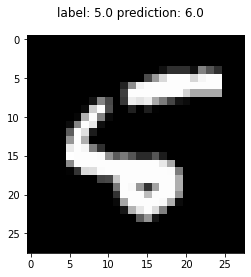

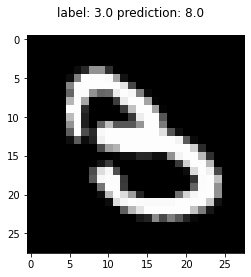

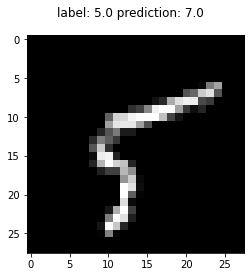

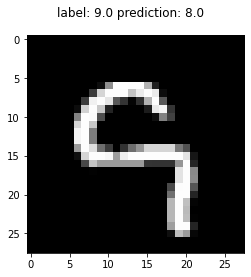

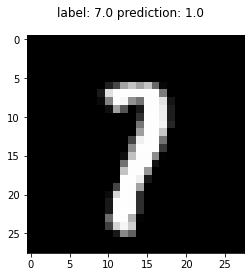

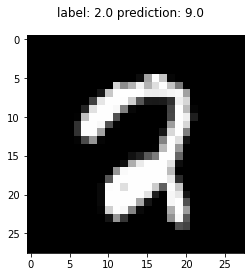

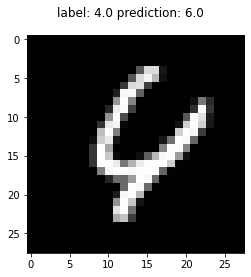

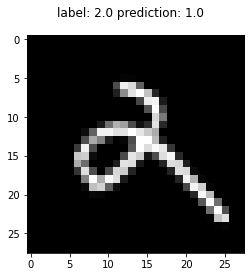

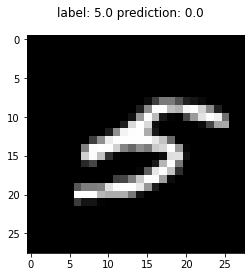

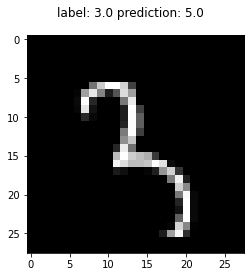

In [ ]:
i = 0
n = 0
while n < 10:
    if int(predictions[i]) != int(test_y[i]):
        fig = plt.figure()
        fig.suptitle("label: " + str(test_y[i]) + " prediction: " + str(predictions[i]))
        plt.imshow(test_X[i].reshape(28, 28), cmap="gray")
        n += 1
    i += 1

In [ ]:
%reset -f

# Convolutional Neural Network with Tensorflow
---
* [Image Kernel Demo](https://setosa.io/ev/image-kernels/)

![cnn](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

In [ ]:
# load the data as a numpy array
import numpy as np

train_data = np.loadtxt("sample_data/mnist_train_small.csv", delimiter=",")
test_data = np.loadtxt("sample_data/mnist_test.csv", delimiter=",")

print("number of tranining images: ", len(train_data))
print("shape of training data:     ", train_data.shape)
print("number of testing images:   ", len(test_data))
print('shape of testing data:      ', test_data.shape)

number of tranining images:  20000
shape of training data:      (20000, 785)
number of testing images:    10000
shape of testing data:       (10000, 785)


In [ ]:
# split the data into features and labels

# shape is (28, 28, 1) because model needs a channel dimension (ie would be 28, 28, 3 for RGB)
train_X = train_data[:, 1:].astype(np.uint8).reshape(-1, 28, 28, 1)
train_y = train_data[:, 0].astype(np.uint8)

test_X = test_data[:, 1:].astype(np.uint8).reshape(-1, 28, 28, 1)
test_y = test_data[:, 0].astype(np.uint8)

print("train_X shape:\t", train_X.shape)
print("train_y shape:\t", train_y.shape)
print("test_X shape:\t", test_X.shape)
print("test_y shape:\t", test_y.shape)

train_X shape:	 (20000, 28, 28, 1)
train_y shape:	 (20000,)
test_X shape:	 (10000, 28, 28, 1)
test_y shape:	 (10000,)


In [ ]:
import tensorflow as tf

# create simple CNN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(
    filters=64, 
    kernel_size=3, 
    strides=(1,1),
    activation='relu', 
    input_shape=(28,28,1)
))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(
    filters=128, 
    kernel_size=3, 
    strides=(1,1),
    activation='relu',
))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
# compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# before training make sure you are using a GPU!
# Runtime > Change runtime type > GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# train the model
history = model.fit(
    train_X, train_y,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(test_X, test_y)
)

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 1.5952 - accuracy: 0.8694 - val_loss: 0.1383 - val_accuracy: 0.9606
Epoch 2/10
157/157 [==============================] - 1s 7ms/step - loss: 0.1007 - accuracy: 0.9707 - val_loss: 0.1058 - val_accuracy: 0.9683
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0593 - accuracy: 0.9814 - val_loss: 0.0809 - val_accuracy: 0.9749
Epoch 4/10
157/157 [==============================] - 1s 7ms/step - loss: 0.0383 - accuracy: 0.9872 - val_loss: 0.0884 - val_accuracy: 0.9760
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.1278 - val_accuracy: 0.9685
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0238 - accuracy: 0.9916 - val_loss: 0.0811 - val_accuracy: 0.9788
Epoch 7/10
157/157 [==============================] - 1s 7ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0883 - val_accuracy: 0.9791
Epoch 

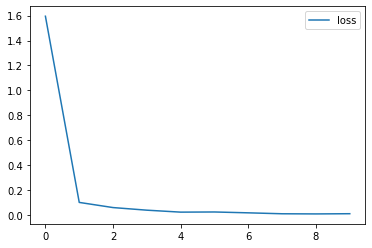

In [ ]:
# loss
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(list(range(10)), history.history["loss"], label="loss")
plt.legend()

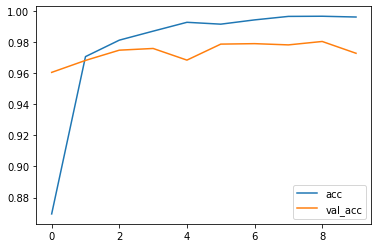

In [ ]:
# accuracy
fig = plt.figure()
plt.plot(list(range(10)), history.history["accuracy"], label="acc")
plt.plot(list(range(10)), history.history["val_accuracy"], label="val_acc")
plt.legend()

In [ ]:
# evaluate the model
output = model.predict(test_X)
output.shape

(10000, 10)

In [ ]:
output[0]

array([6.2300378e-14, 9.8007397e-14, 2.1276758e-14, 5.1725606e-11,
       1.6329227e-23, 8.9014343e-19, 2.3341264e-29, 1.0000000e+00,
       3.5215041e-15, 6.0039838e-15], dtype=float32)

In [ ]:
predictions = np.argmax(output, axis=-1)
predictions[0]

7

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.99      0.94      0.96      1032
           3       0.97      0.99      0.98      1010
           4       0.93      1.00      0.96       982
           5       0.98      0.98      0.98       892
           6       1.00      0.95      0.97       958
           7       0.95      0.98      0.97      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
%reset -f

# Tips and Next Steps
* Spend as much time with the data as you do with your code!
* Describe your problem in one sentence, and find an article/blog post online that solves the same problem (i.e. is your problem image classification? object segmentation? univariate time series? multivariate time series? multi-horizon time series? sequence to sequence prediction? etc ...). Essentially, correctly formulating your problem will help you find what you need to google
* If something is not working, check the shape of the data and ask if it makes sense (really really good advice for debugging why your neural network isn't working)
* If it's too good to be true, it's probably not true (more often than not, if your model is performing spookily well, either you're your train set and test set overlap, or you are intepreting the results wrong)
* Colab is great, use it!
* If you double your batch size, half your learning rate and vice versa

In [ ]:
# if you know the url to download a csv or any other file, you can easily download it 
# in colab like so:
!wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

--2022-01-22 04:21:04--  https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2022-01-22 04:21:04 (65.7 MB/s) - ‘iris.csv’ saved [3858/3858]



In [ ]:
import pandas as pd
iris_df = pd.read_csv("iris.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
